<center><h1> Analiza internacionalnih utakmica u posljednih 30ak godina </h1></center>
<center><h3> </h3></center> 
<center><h3> </h3></center> 
<center><h3> Tonino Kaštelan, Matej Kožica, Nikola Tafra</h3></center>
<center><h3> </h3></center> 
<center><h4> Akademska godina 2022./2023.</h4></center>

## Opis projekta i podaci

Za potrebe ovog projekta iskorišteni su podaci dostupni na sljedećem linku: https://www.kaggle.com/datasets/brenda89/fifa-world-cup-2022.
U sklopu navedenog skupa podataka moguće je pronaći sve informacije o internacionalnim utakmicama odigranih od 08.08.1993. godine. Podaci se sastoje od sljedećih stupaca:

| Stupac   | Opis  |
|----------|:-------------|
| `date`           | Datum kada je utakmica odigrana |
| `home_team`            | Domaća momčad. |
| `away_team`      | Gostujuća momčad. |
| `home_team_continent`      | Kontinent s kojeg dolazi domaća momčad. |
| `away_team_continent`            | Kontinent s kojeg dolazi gostujuća momčad |
| `home_team_fifa_rank`     | FIFA ranking domaće momčadi. |
| `away_team_fifa_rank`            | FIFA ranking gostujuće momčadi. |
| `home_team_total_fifa_points`       | Zbroj FIFA bodova svih igrača domaće momčadi.  |
| `away_team_total_fifa_points` | Zbroj FIFA bodova svih igrača gostujuće momčadi. |
| `home_team_score` | Broj golova domaće momčadi. |
| `away_team_score` | Broj golova gostujuće momčadi |
| `tournament` | Natjecanje u sklopu kojeg je utakmica odigrana. |
| `city` | Grad u kojem je utakmica odigrana. |
| `country` | Država u kojoj je utakmica odigrana. |
| `neutral_location` | NEMAM POJMA ŠTA JE OVO. |
| `shoot_out` | Je li utakmica završila izvođenjem jedanaesteraca? |
| `home_team_result` | Ishod utakmice za domaću momčad. |
| `home_team_goalkeeper_score` | FIFA ranking golmana domaće momčadi. |
| `away_team_goalkeeper_score` | FIFA ranking golmana gostujuće momčadi. |
| `home_team_mean_defense_score` | Prosjek FIFA bodova defenzivnih igrača domaće momčadi. |
| `home_team_mean_offense_score` | Prosjek FIFA bodova ofenzivnih igrača domaće momčadi. |
| `home_team_mean_midfield_score` | Prosjek FIFA bodova veznih igrača domaće momčadi. |
| `away_team_mean_defense_score` | Prosjek FIFA bodova defenzivnih igrača gostujuće momčadi. |
| `away_team_mean_offense_score` | Prosjek FIFA bodova ofenzivnih igrača gostujuće momčadi. |
| `away_team_mean_midfield_score` | Prosjek FIFA bodova veznih igrača gostujuće momčadi. |

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

matches_df = pd.read_csv('./international_matches.csv')

**Gradovi u kojima je odigrano najviše internacionalnih utakmica**

**Gradovi u kojima je odigrano najmanje internacionalnih utakmica**

**Države u kojima je odigrano najviše internacionalnih utakmica**

**Države u kojima je odigrano najviše internacionalnih utakmica**

**Države koje u prosjeku imaju najbolji vezni red po FIFA ocjenama**

<AxesSubplot: xlabel='mean_midfield_score', ylabel='country'>

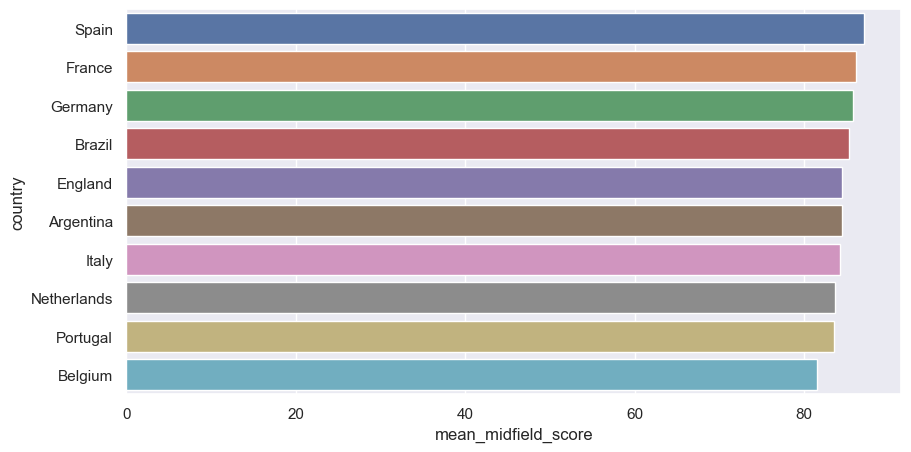

In [40]:
home_team_midfield_mean_score = pd.DataFrame(matches_df[['home_team', 'home_team_mean_midfield_score']].dropna().values, columns=['country', 'mean_midfield_score'])
away_team_midfield_mean_score = pd.DataFrame(matches_df[['away_team', 'away_team_mean_midfield_score']].dropna().values, columns=['country', 'mean_midfield_score'])
countries_midfield_mean_score = pd.concat([home_team_midfield_mean_score, away_team_midfield_mean_score])
countries_midfield_mean_score = countries_midfield_mean_score.groupby(countries_midfield_mean_score['country'], as_index=False).aggregate('mean').sort_values(by='mean_midfield_score', ascending=False)
countries_midfield_mean_score = countries_midfield_mean_score.head(10)

sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(data=countries_midfield_mean_score, y=countries_midfield_mean_score['country'], x=countries_midfield_mean_score['mean_midfield_score'], orient='h')

**Države koje u prosjeku imaju najbolju obranu po FIFA ocjenama**

<AxesSubplot: xlabel='mean_defense_score', ylabel='country'>

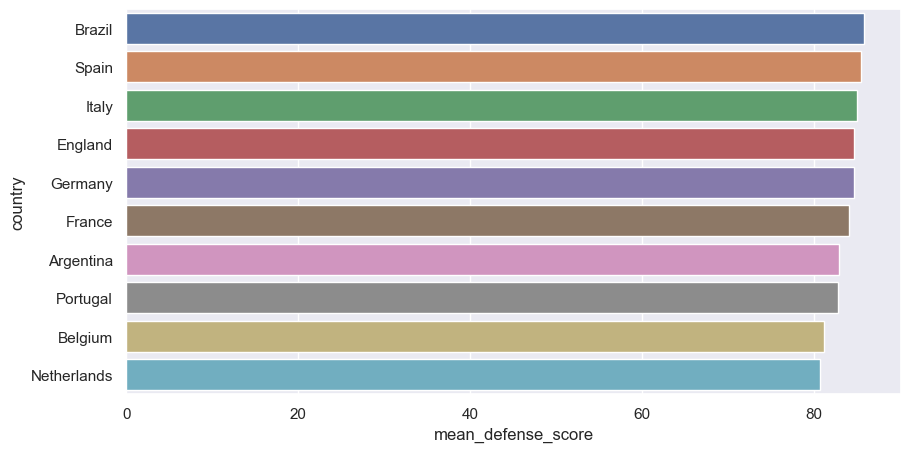

In [41]:
home_team_defense_mean_score = pd.DataFrame(matches_df[['home_team', 'home_team_mean_defense_score']].dropna().values, columns=['country', 'mean_defense_score'])
away_team_defense_mean_score = pd.DataFrame(matches_df[['away_team', 'away_team_mean_defense_score']].dropna().values, columns=['country', 'mean_defense_score'])
countries_defense_mean_score = pd.concat([home_team_defense_mean_score, away_team_defense_mean_score])
countries_defense_mean_score = countries_defense_mean_score.groupby(countries_defense_mean_score['country'], as_index=False).aggregate('mean').sort_values(by='mean_defense_score', ascending=False)
countries_defense_mean_score = countries_defense_mean_score.head(10)

sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(data=countries_defense_mean_score, y=countries_defense_mean_score['country'], x=countries_defense_mean_score['mean_defense_score'], orient='h')

**Države koje u prosjeku imaju najbolji napad po FIFA ocjenama**

<AxesSubplot: xlabel='mean_offense_score', ylabel='country'>

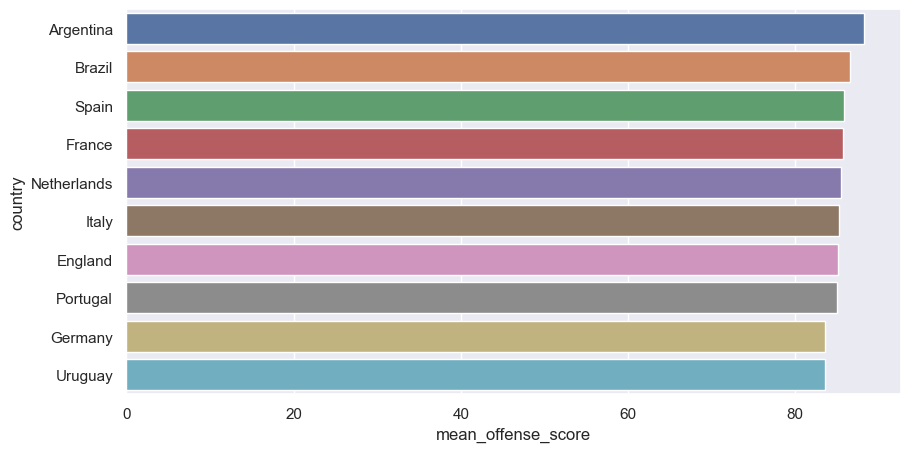

In [43]:
home_team_offense_mean_score = pd.DataFrame(matches_df[['home_team', 'home_team_mean_offense_score']].dropna().values, columns=['country', 'mean_offense_score'])
away_team_offense_mean_score = pd.DataFrame(matches_df[['away_team', 'away_team_mean_offense_score']].dropna().values, columns=['country', 'mean_offense_score'])
countries_offense_mean_score = pd.concat([home_team_offense_mean_score, away_team_offense_mean_score])
countries_offense_mean_score = countries_offense_mean_score.groupby(countries_offense_mean_score['country'], as_index=False).aggregate('mean').sort_values(by='mean_offense_score', ascending=False)
countries_offense_mean_score = countries_offense_mean_score.head(10)
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(data=countries_offense_mean_score, y=countries_offense_mean_score['country'], x=countries_offense_mean_score['mean_offense_score'], orient='h')

**Utakmice u kojima je zabijeno najviše golova**

**Države s najviše zabijenih golova**

In [49]:
home_team_score = pd.DataFrame(matches_df[['home_team', 'home_team_score']].dropna().values, columns=['country', 'score'])
away_team_score = pd.DataFrame(matches_df[['away_team', 'away_team_score']].dropna().values, columns=['country', 'score'])
countries_score = pd.concat([home_team_score, away_team_score])
countries_score = countries_score.groupby(countries_score['country'], as_index=False).aggregate('sum').sort_values(by='score', ascending=False)
countries_score = countries_score.head(20)
sns.set(rc={'figure.figsize':(30,5)})
sns.barplot(data=countries_score, x=countries_score['country'], y=countries_score['score'])

**Države s najmanje zabijenih golova**

In [48]:
home_team_score = pd.DataFrame(matches_df[['home_team', 'home_team_score']].dropna().values, columns=['country', 'score'])
away_team_score = pd.DataFrame(matches_df[['away_team', 'away_team_score']].dropna().values, columns=['country', 'score'])
countries_score = pd.concat([home_team_score, away_team_score])
countries_score = countries_score.groupby(countries_score['country'], as_index=False).aggregate('sum').sort_values(by='score')
countries_score = countries_score.head(20)
sns.set(rc={'figure.figsize':(5,15)})
sns.barplot(data=countries_score, y=countries_score['country'], x=countries_score['score'], orient='h')

**Države koje su u jednoj utakmici zabile najviše golova**

**Države koje su u jednoj utakmici zabile najviše golova, a izgubile**

**Države koje su pobjedile unatoč velikoj razlici FIFA score-a**

[Text(0.5, 0, 'Fifa points'), Text(0, 0.5, 'Match name')]

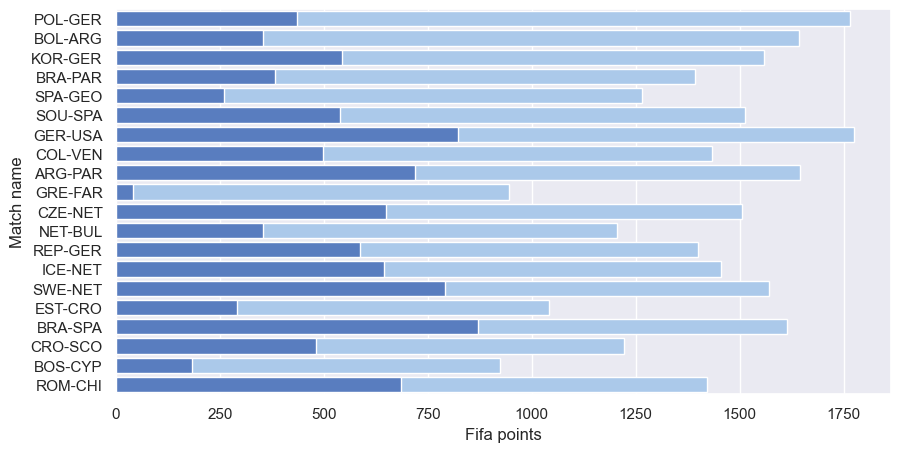

In [45]:
upset_matches = pd.DataFrame(matches_df[['home_team', 'away_team', 'home_team_total_fifa_points', 'away_team_total_fifa_points', 'home_team_result', 'tournament']])
upset_matches['fifa_score_difference'] = upset_matches.apply(lambda x: abs(x['home_team_total_fifa_points'] - x['away_team_total_fifa_points']), axis=1)
upset_matches['match_name'] = upset_matches.apply(lambda x: x['home_team'][:3].upper() + '-' + x["away_team"][:3].upper(), axis=1)

upset_matches['weaker_team_fifa_points'] = upset_matches.apply(lambda x: x['home_team_total_fifa_points'] if(x['home_team_total_fifa_points'] - x['away_team_total_fifa_points'] < 0) else x['away_team_total_fifa_points'] , axis=1)
upset_matches['stronger_team_fifa_points'] = upset_matches.apply(lambda x: x['home_team_total_fifa_points'] if(x['home_team_total_fifa_points'] - x['away_team_total_fifa_points'] > 0) else x['away_team_total_fifa_points'] , axis=1)

upset_matches = upset_matches[upset_matches['fifa_score_difference'] > 10].sort_values(by='fifa_score_difference', ascending=False)
upset_matches = upset_matches[((upset_matches['home_team_total_fifa_points'] - upset_matches['away_team_total_fifa_points'] < 0) & (upset_matches['home_team_result'] == 'Win')) | ((upset_matches['home_team_total_fifa_points'] - upset_matches['away_team_total_fifa_points'] > 0) & (upset_matches['home_team_result'] == 'Lose'))]
upset_matches_graph = upset_matches.head(20)


sns.set_color_codes("pastel")
graph = sns.barplot(x='stronger_team_fifa_points', y="match_name", data=upset_matches_graph, color="b")

sns.set_color_codes("muted")
graph = sns.barplot(x='weaker_team_fifa_points', y="match_name", data=upset_matches_graph, color="b")

graph.set(xlabel="Fifa points", ylabel="Match name")


**Natjecanja sa najviše preokreta**

In [17]:
aggregated = upset_matches.groupby('tournament').aggregate('size').sort_values(ascending=False)
aggregated = pd.DataFrame({'tournament': aggregated.index, 'number_of_upsets': aggregated.values})
aggregated = aggregated.head(10)
sns.set(rc={'figure.figsize':(5,5)})
graph = sns.barplot(data=aggregated, y=aggregated['tournament'], x=aggregated['number_of_upsets'], orient='h')
graph.set(xlabel="Number of upsets", ylabel="Tournament name")


' graph = sns.barplot(data=aggregated, y=aggregated[\'tournament\'], x=aggregated[\'number_of_upsets\'], orient=\'h\')\ngraph.set(xlabel="Number of upsets", ylabel="Tournament name") '

<AxesSubplot: xlabel='fifa_points', ylabel='score'>

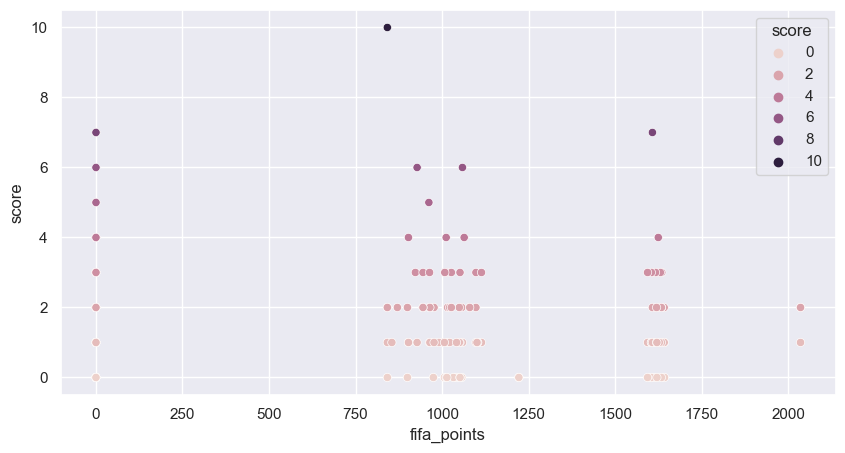

In [48]:
croatia_home_matches = matches_df.loc[matches_df['home_team'] == 'Croatia']
croatia_away_matches = matches_df.loc[matches_df['away_team'] == 'Croatia']

croatia_home_matches = pd.DataFrame(croatia_home_matches[['home_team', 'home_team_score', 'home_team_total_fifa_points']].dropna().values, columns=['country', 'score', 'fifa_points'])
croatia_away_matches = pd.DataFrame(croatia_away_matches[['away_team', 'away_team_score', 'away_team_total_fifa_points']].dropna().values, columns=['country', 'score', 'fifa_points'])



croatia_matches = pd.concat([croatia_away_matches, croatia_home_matches])

sns.scatterplot(data=croatia_matches, x="fifa_points", y="score", hue="score")